In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = load_iris().data
target = load_iris().target

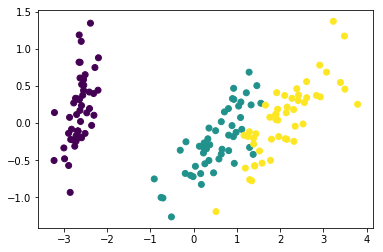

In [7]:
pca = PCA(n_components=2)
train = pca.fit_transform(data)
plt.scatter(train[:,0],train[:,1],c=target)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2)

# 确定要使用的算法模型对象
svc = SVC()
# 确定要调整的参数集合
prama_dic = {
    'kernel':['linear','rbf'],
    'C':[0.001,0.01,0.1,1,10,100],
    'gamma':np.arange(0,10,step=2)
}

# 创建一个GridSearchCV对象
grid_cv = GridSearchCV(estimator=svc,param_grid=prama_dic)
# 使用GridSearchCV对象对数据进行训练
grid_cv.fit(X_train,y_train)

# print("SVC在训练集上的评分是{}".format(svc.score(X_train,y_train)))
# print("SVC在测试集上的评分是{}".format(svc.score(X_test,y_test)))

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': array([0, 2, 4, 6, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
# 获取最优参数集
grid_cv.best_params_

{'C': 1, 'gamma': 0, 'kernel': 'linear'}

In [21]:
# 获取最优参数配置的模型
best_svc = grid_cv.best_estimator_

In [22]:
# 直接使用最优的模型进行预测
print("SVC在训练集上的评分是{}".format(best_svc.score(X_train,y_train)))
print("SVC在测试集上的评分是{}".format(best_svc.score(X_test,y_test)))

SVC在训练集上的评分是0.9666666666666667
SVC在测试集上的评分是0.9


In [26]:
logistic = LogisticRegression()
param_dic = {
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l1','l2']
}
grid_cv = GridSearchCV(logistic,param_dic)
grid_cv.fit(train,target)
best_logistic = grid_cv.best_estimator_

print("Logistic最优参数集为{}".format(grid_cv.best_params_))
print("Logistic在训练集上的评分是{}".format(best_logistic.score(X_train,y_train)))
print("Logistic在测试集上的评分是{}".format(best_logistic.score(X_test,y_test)))

Logistic最优参数集为{'C': 10, 'penalty': 'l1'}
Logistic在训练集上的评分是0.9666666666666667
Logistic在测试集上的评分是0.9666666666666667


In [27]:
# 绘制分类边界
# 数据集 data  训练集 train

array([[ 2.3875644 ,  0.46251925],
       [-2.56239095,  0.37468456],
       [ 2.15873837, -0.21832553],
       [ 0.71400821,  0.15037915],
       [ 0.51938325, -1.19135169],
       [ 1.29066965, -0.11642525],
       [ 0.37523823, -0.29162202],
       [-2.58734619,  0.52047364],
       [-2.54323491,  0.44003175],
       [ 3.07652162,  0.68576444],
       [ 0.93241075,  0.31919809],
       [ 2.10765373,  0.37148225],
       [-0.5110862 , -1.26249195],
       [ 1.25762518, -0.179137  ],
       [-2.72859298,  0.33392456],
       [-0.75146714, -1.00110751],
       [ 2.91813423,  0.78038063],
       [-3.22520045, -0.50327991],
       [-2.8403213 , -0.22057634],
       [ 3.39687992,  0.54716805],
       [ 0.16451343, -0.67966147],
       [-2.53757337,  0.51036755],
       [ 0.22887905, -0.40225762],
       [ 0.0432464 , -0.58148945],
       [ 0.35553304, -0.50321849],
       [-0.07034289, -0.70253793],
       [ 1.09522371,  0.28389121],
       [ 2.61648461,  0.34193529],
       [-2.3105317 ,

In [29]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [30]:
X_train

array([[5.1, 3.7, 1.5, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [7.7, 3. , 6.1, 2.3],
       [5.1, 3.5, 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 3. , 4.9, 1.8],
       [4.5, 2.3, 1.3, 0.3],
       [6.2, 3.4, 5.4, 2.3],
       [7.2, 3. , 5.8, 1.6],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 4.7, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.5, 1.4, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [5.1, 3.8, 1.5, 0.3],
       [5.6, 3

In [36]:
pca = PCA(n_components=2)
pca_X_train = pca.fit_transform(X_train)

logistic = LogisticRegression()
param_dic = {
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l1','l2']
}
grid_cv = GridSearchCV(logistic,param_dic)
grid_cv.fit(pca_X_train,y_train)
best_logistic = grid_cv.best_estimator_

print("Logistic最优参数集为{}".format(grid_cv.best_params_))
print("Logistic在训练集上的评分是{}".format(best_logistic.score(pca_X_train,y_train)))
# print("Logistic在测试集上的评分是{}".format(best_logistic.score(X_test,y_test)))

Logistic最优参数集为{'C': 10, 'penalty': 'l1'}
Logistic在训练集上的评分是0.9666666666666667


In [39]:
# 如果算法模型训练数据是降维处理过的，那么对于新的预测数据也要进行相同的降维处理
pca_X_test = pca.transform(X_test)
best_logistic.predict(pca_X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 0])